# NLP - Spam Detection using CNN

Although CNN is mainly used for images, we still can use it for text classfication.  Think of a text as 1 dimensional image.  

## Step 1: Load the Data

In [1]:
import tensorflow as tf

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [4]:
df = pd.read_csv('./spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,v1.1,v2.1,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df[['v1', 'v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Data cleaning

In [6]:
print(set(df.v1))

{'ham"""', 'spam', 'ham'}


In [7]:
for i in range(len(df)):
    if df.v1[i] == 'ham"""':
        df.v1[i] = 'ham'  

In [8]:
for i in range(len(df)):
    if type(df.v2[i]) != str:
        df.v2[i] = " "

In [9]:
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [11]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

## Step 2: Build the model

In [13]:
df_train = np.array(df_train)
df_test = np.array(df_test)
print(df_train.shape)

(3735,)


In [14]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test) #<- output is a list 
# this is in the form of [[1,2,3,4,5], [2,3,4], .... , [1,3,4,5]]
print('sequences_train type is', type(sequences_train))

sequences_train type is <class 'list'>


In [15]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokes.' % V)

Found 7157 unique tokes.


In [16]:
data_train = pad_sequences(sequences_train) # <- output is numpy array
print('Shape of data train tensor:', data_train.shape)
print('data_train type is', type(data_train))

T = data_train.shape[1]
print(T)

Shape of data train tensor: (3735, 189)
data_train type is <class 'numpy.ndarray'>
189


In [17]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1841, 189)


In [22]:
D = 20 

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = Conv1D(32,3,activation = 'relu')(x)
x = MaxPooling1D(3)(x) 
x = Conv1D(64,3,activation = 'relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3, activation = 'relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i,x)

## Step 3: Train

In [24]:
# Compile and fit
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=20,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/20
117/117 [==============================] - 1s 9ms/step - loss: 0.3834 - accuracy: 0.8605 - val_loss: 0.2788 - val_accuracy: 0.8631
Epoch 2/20
117/117 [==============================] - 1s 8ms/step - loss: 0.1230 - accuracy: 0.9440 - val_loss: 0.0786 - val_accuracy: 0.9826
Epoch 3/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0891 - val_accuracy: 0.9853
Epoch 4/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0810 - val_accuracy: 0.9880
Epoch 5/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0977 - val_accuracy: 0.9880
Epoch 6/20
117/117 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0868 - val_accuracy: 0.9859
Epoch 7/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0887 - val_accur

## Step 4: Evaluate

In [35]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 189)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 189, 20)           143160    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 187, 32)           1952      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 62, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 60, 64)            6208      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 20, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 18, 128)          

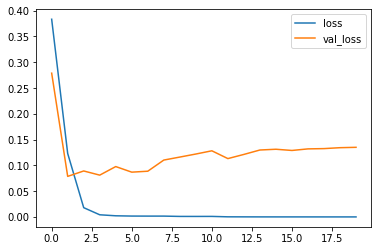

In [36]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

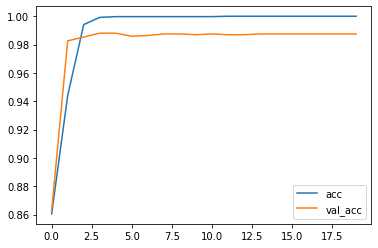

In [37]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [38]:
prediction = model.predict(data_test)
prediction = np.rint(prediction)
prediction = prediction.astype(int)
prediction.reshape(-1)

array([0, 0, 0, ..., 1, 0, 0])

In [39]:
Ytest = Ytest.astype(int)

In [40]:
l = []
for i in range(len(Ytest)):
    if prediction[i] != Ytest[i]:
        l.append(i)

In [41]:
for i in range(10):
    random_number = np.random.choice(l)
    print(df_test[random_number])
    print("it is predicted:",prediction[random_number][0], "but actually it is", Ytest[random_number])
    print("")

Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Other nos used also. Beware!
it is predicted: 0 but actually it is 1

Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Other nos used also. Beware!
it is predicted: 0 but actually it is 1

Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
it is predicted: 0 but actually it is 1

In The Simpsons Movie released in July 2007 name the band that died at the start of the film? A-Green Day, B-Blue Day, C-Red Day. (Send A, B or C)
it is predicted: 0 but actually it is 1

Can you call me plz. Your number shows out of coveragd area. I have urgnt call in vasai &amp; have to reach before 4'o clock so call me plz
it is predicted: 1 but actually it is 0

Did you hear about the new \Divorce Barbie\"? It comes with

## Step 5: Prediction

In [51]:
X = ["Meet Sexy milfs.  you can cum all over her face"]
X = np.array(X)

In [52]:
tokenizer.fit_on_texts(X)
random_sentence = tokenizer.texts_to_sequences(X)
random_test = pad_sequences(random_sentence, maxlen=T)

In [53]:
if model.predict(random_test) < 0.5:
    print("The message", X, "is not a spam")
else: 
    print("The message", X, "is a spam")

The message ['Meet Sexy milfs.  you can cum all over her face'] is not a spam


This isn't a spam?  hmm...